# Analysis of Variance

Suppose that we have multiple "groups" of data.  They may all come from the same population (and thus we would expect them all to have self-consistent sample means and variances.  Or, they may come from different populations, in which case we might expect their sample means and variances to differ from one another.  The process of ANalysis Of VAriance (ANOVA) is designed to assess which of these two situations exist.

We begin by assuming a null hypothesis - all of the groups come from the same population, and thus we expect the sample means to be consistent with one another.  Of course, we still expect some variance in the data WITHIN each group, due to random statistical fluctuations in any sampling experiment.

Imagine an experiment in which there are three groups of data, all taken from the same population, which has mu=100 and sigma=10

Variance of all 300 data points = 122.74


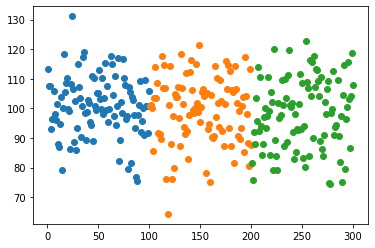

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

mu = 100
sigma = 10
N1 = 300

a1 = 3
n1 = 100

data1 = stats.norm.rvs(size=N1,loc=mu,scale=sigma)
group1a = data1[0:int(N1/3)]
group1b = data1[int(N1/3):int(2*N1/3)]
group1c = data1[int(2*N1/3):N1]

x1a = np.linspace(1,int(N1/3),int(N1/3))
x1b = np.linspace(int(N1/3)+1,int(2*N1/3),int(N1/3))
x1c = np.linspace(int(2*N1/3)+1,N1,int(N1/3))

plt.scatter(x1a,group1a)
plt.scatter(x1b,group1b)
plt.scatter(x1c,group1c)

print ("Variance of all 300 data points = %0.2f" % (data1.var()))

Now, imagine a second experiment, where there are three groups of data.  The three groups are taken from three different populations, with means of mu = (100, 110, 90).  The standard deviation of each of these populations is sigma = 6.0 

Variance of all 300 data points = 48.17


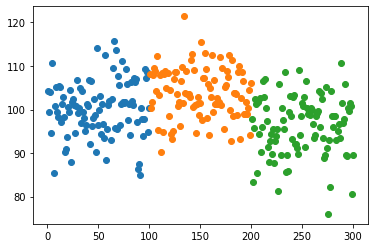

In [18]:
mu1 = 100
mu2 = 103
mu3 = 97

sigma = 6.2
N2 = 300

a2 = 3
n2 = 100

group2a = stats.norm.rvs(size=int(N2/3),loc=mu1,scale=sigma)
group2b = stats.norm.rvs(size=int(N2/3),loc=mu2,scale=sigma)
group2c = stats.norm.rvs(size=int(N2/3),loc=mu3,scale=sigma)

data2 = np.concatenate([group2a,group2b,group2c])

x2a = np.linspace(1,int(N2/3),int(N2/3))
x2b = np.linspace(int(N2/3)+1,int(2*N2/3),int(N2/3))
x2c = np.linspace(int(2*N2/3)+1,int(N2),int(N2/3))

plt.scatter(x2a,group2a)
plt.scatter(x2b,group2b)
plt.scatter(x2c,group2c)

print ("Variance of all 300 data points = %0.2f" % (data2.var()))

## The question is:  How do we differentiate between these two cases?

We will introduce some new terminology:

The number of data points within each group = $n$

The number of groups = $a$

The total number of data points = $N$ = $a \cdot n$

The overall average of all $N$ data points = $\bar{\bar{x}} = \frac{1}{N} \sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ij}}$

The average of the $n$ data points for a group = $\bar{x}_i = \frac{1}{n} \sum_{j=1}^{n} {x_{ij}}$

Recall the definition of variance:

$s^2 = \frac{1}{N_{dof}} \sum_{i=1}^{a} \sum_{j=1}^{n} {(x_{ij}-\bar{\bar{x}})^2} = \frac{SS_{total}}{N_{dof}}$

where we have introduced the terminology "SS" = "Sum of Squares" to indicate the double summation term. $SS_{total}$ represents the total variance of the entire data set with respect to the overall sample mean of all data points.

We may also calculate two other sums of squares - one related to the statistical variation WITHIN groups, and a second related to the variation BETWEEN groups:

$SS_{error} = \sum_{i=1}^{a} \sum_{j=1}^{n}(x_{ij} - \bar{x}_i)^2$

$SS_{treatment} = \sum_{i=1}^{a} n(\bar{x}_i - \bar{\bar{x}})^2$

One can show that:

$SS_{total} = SS_{treatment} + SS_{error}$

In [19]:
dof1 = N1 - 1
SS1_total = dof1*data1.var(ddof=1)
print ("SS1_total = ",SS1_total)

xbarbar1 = data1.mean()
print ("Xbarbar1 = ",xbarbar1)

t1a = int(N1/3)*(group1a.mean()-xbarbar1)**2
t1b = int(N1/3)*(group1b.mean()-xbarbar1)**2
t1c = int(N1/3)*(group1c.mean()-xbarbar1)**2

SS1_treatment = t1a + t1b + t1c
print()
print ("SS1_treatment = ",SS1_treatment)

SS1_error = 0.0
for x in group1a:
    SS1_error += (x - group1a.mean())**2
for x in group1b:
    SS1_error += (x - group1b.mean())**2
for x in group1c:
    SS1_error += (x - group1c.mean())**2
    
print ("SS1_error = ",SS1_error)

print ()
print ("Total Check: ",SS1_error + SS1_treatment, SS1_total)

SS1_total =  36820.80071768531
Xbarbar1 =  99.53081897132785

SS1_treatment =  373.60097491179744
SS1_error =  36447.19974277352

Total Check:  36820.80071768531 36820.80071768531


In [20]:
dof2 = N2 - 1
SS2_total = dof2*data2.var(ddof=1)
print ("SS2_total = ",SS2_total)

xbarbar2 = data2.mean()
print ("Xbarbar2 = ",xbarbar2)

sst = 0.0
for x in data2:
    sst += (x-xbarbar2)**2

t2a = int(N2/3)*(group2a.mean()-xbarbar2)**2
t2b = int(N2/3)*(group2b.mean()-xbarbar2)**2
t2c = int(N2/3)*(group2c.mean()-xbarbar2)**2

SS2_treatment = t2a + t2b + t2c
print()
print ("SS2_treatment = ",SS2_treatment)

SS2_error = 0.0
for x in group2a:
    SS2_error += (x - group2a.mean())**2
for x in group2b:
    SS2_error += (x - group2b.mean())**2
for x in group2c:
    SS2_error += (x - group2c.mean())**2
    
print ("SS2_error =",SS2_error)

print()
print ("Total Check: ",SS2_error + SS2_treatment, SS2_total)

SS2_total =  14451.47405272106
Xbarbar2 =  100.1778606900893

SS2_treatment =  2740.1152573927784
SS2_error = 11711.35879532825

Total Check:  14451.474052721027 14451.47405272106


### The $SS_{treatment}$ represents the "signal" that we are looking for, whereas $SS_{error}$ represents the "noise".  We can use these to calculate a signal to noise ratio for the data.  

We begin by calculating the MEAN SQUARE values:

$MS_{error} = SS_{error} / N_{dof}^{error}$

$MS_{treatment} = SS_{treatment} / N_{dof}^{treatment} $

where

$N_{dof}^{treatment} = (a - 1)$

$N_{dof}^{total} = N - 1$

$N_{dof}^{error} = N_{dof}^{total} - N_{dof}^{treatment}$

### The signal to noise ratio is the ratio of the treatment mean square to the error mean square, and is in fact an F value!

$F_{S/N} = \frac{MS_{treatment}}{MS_{error}}$

In [21]:
dof1_treatment = a1 - 1
dof1_total = N1 - 1
dof1_error = dof1_total - dof1_treatment

print ("Degrees of Freedom: total,treatment,error = ",dof1_total,dof1_treatment,dof1_error)

Degrees of Freedom: total,treatment,error =  299 2 297


In [22]:
MS1_error = SS1_error/dof1_error
MS1_treatment = SS1_treatment/dof1_treatment

print ("Mean Squares: ",MS1_treatment,MS1_error)

fSN = MS1_treatment/MS1_error

print ("F Signal/Noise = %0.3f " % fSN)

alpha = 0.05

fdist = stats.f(dof1_treatment,dof1_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.3f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

Mean Squares:  186.80048745589872 122.71784425176268
F Signal/Noise = 1.522 
Critical F-value = 3.026
Pvalue = 0.220


In [23]:
dof2_treatment = a2 - 1
dof2_total = N2 - 1
dof2_error = dof2_total - dof2_treatment

print ("Degrees of Freedom: total,treatment,error = ",dof2_total,dof2_treatment,dof2_error)

Degrees of Freedom: total,treatment,error =  299 2 297


In [24]:
MS2_error = SS2_error/dof2_error
MS2_treatment = SS2_treatment/dof2_treatment

print ("Mean Squares: ",MS2_treatment,MS2_error)

fSN = MS2_treatment/MS2_error

print ("F Signal/Noise = %0.3f " % fSN)

alpha = 0.05

fdist = stats.f(dof2_treatment,dof2_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.3f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

Mean Squares:  1370.0576286963892 39.43218449605471
F Signal/Noise = 34.745 
Critical F-value = 3.026
Pvalue = 0.000


# Note the incredible power of this methodology in revealing differences between groups that are not visibly obvious!!!!

As you probably could have guessed, there are built in Python Stats functions that can make this process considerably easier!

In [25]:
F_statistic, pVal = stats.f_oneway(group1a, group1b, group1c)

print ("F Signal/Noise = %0.3f " % F_statistic)
print ("Pvalue = %0.3f" % (pVal))

F Signal/Noise = 1.522 
Pvalue = 0.220


In [26]:
F_statistic, pVal = stats.f_oneway(group2a, group2b, group2c)

print ("F Signal/Noise = %0.3f " % F_statistic)
print ("Pvalue = %0.3f" % (pVal))

F Signal/Noise = 34.745 
Pvalue = 0.000


In [27]:
groupA = group1a
groupB = group1b
groupC = group1c

a = 3
n = 100

idA = np.ones(n)
idB = 2.0*np.ones(n)
idC = 3.0*np.ones(n)

data = np.concatenate([groupA,groupB,groupC])
id = np.concatenate([idA,idB,idC])

data2 = np.transpose(np.vstack((data,id)))

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data2,columns=['value','treatment'])
model = ols('value ~ C(treatment)',df).fit()
anovaResults = anova_lm(model)

print (anovaResults)

                 df        sum_sq     mean_sq         F   PR(>F)
C(treatment)    2.0    373.600975  186.800487  1.522195  0.21993
Residual      297.0  36447.199743  122.717844       NaN      NaN


In [28]:
groupA = group2a
groupB = group2b
groupC = group2c

a = 3
n = 100

idA = np.ones(n)
idB = 2.0*np.ones(n)
idC = 3.0*np.ones(n)

data = np.concatenate([groupA,groupB,groupC])
id = np.concatenate([idA,idB,idC])

data2 = np.transpose(np.vstack((data,id)))

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data2,columns=['value','treatment'])
model = ols('value ~ C(treatment)',df).fit()
anovaResults = anova_lm(model)

print (anovaResults)

                 df        sum_sq      mean_sq          F        PR(>F)
C(treatment)    2.0   2740.115257  1370.057629  34.744655  2.762028e-14
Residual      297.0  11711.358795    39.432184        NaN           NaN


# Example 1 - Analysis of Summary Statistics

In many cases, we do not have access to the raw data from an experiment; this is very typical when looking at published papers. Rather than giving all of the raw data, authors give the averages of each group, the number of groups and the number of samples within each group, and one extra quantity - $\sum_i \sum_j {x_{ij}^2}$.  These
are known collectively as "summary statistics". 

With these quantities, we can find all of the necessary quantities for carrying out 
a typical one-way ANOVA!

$SS_{total} = \sum_{i=1}^{a} \sum_{j=1}^{n} {(x_{ij}-\bar{\bar{x}})^2}$


$SS_{total} = \sum_{i=1}^{a} \sum_{j=1}^{n} {(x_{ij}^2-2x_{ij}\bar{\bar{x}} + \bar{\bar{x}}^2)}$

$SS_{total} = \sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ij}^2} -2\bar{\bar{x}}\sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ij}} + \bar{\bar{x}}^2 \sum_{i=1}^{a} \sum_{j=1}^{n} {1}$

From here, we know that:

$\sum_{i=1}^{a} \sum_{j=1}^{n} {1} = N$

and

$\sum_{j=1}^{n} {x_{ij}} = N \bar{\bar{x}}$

and therefore:

$SS_{total} = \sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ij}^2} - N \bar{\bar{x}}^2$

We also know that:

$SS_{treatment} = \sum_{i=1}^{a} n(\bar{x}_i - \bar{\bar{x}})^2$

and

$SS_{error} = SS_{total} - SS_{treatment}$

Let's consider the following case:

An experiment collects data for four groups, and records eight data points for each group.

The summary data values are $\bar{x}_1$ = 4.28, $\bar{x}_2$ = 4.81, $\bar{x}_3$ = 5.39, and $\bar{x}_4$ = 5.88.  In addition, we are told that $\sum_i \sum_j {x_{ij}}$  = 855.6192.

In [29]:
a = 4
n = 8

# calculate DOF's
N = a*n
dof_total = N - 1
dof_treatment = a - 1
dof_error = dof_total - dof_treatment

# summary data for xbar
xbar = np.array([4.28,4.81,5.39,5.88])
xbarbar = xbar.mean()

# calculate SS_treatment
SS_treatment = 0.0
for x in xbar:
    SS_treatment += n*(x-xbarbar)**2
    
# calculate SS_total and SS_error
sumxij2 = 855.6192
SS_total = sumxij2-N*xbarbar**2
SS_error = SS_total-SS_treatment

# Proceed with normal ANOVA from here
MS_treatment = SS_treatment/dof_treatment
MS_error = SS_error/dof_error

fSN = MS_treatment/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(dof_treatment,dof_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

F Signal/Noise = 7.22 
Critical F-value = 2.95
Pvalue = 0.001


In [30]:
# print table

print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("Groups     %0.0f       %0.2f           %0.2f       %0.2f    %0.3f" %(dof_treatment,SS_treatment,MS_treatment,fSN,pvalue))
print ("Error      %0.0f      %0.2f          %0.2f" %(dof_error,SS_error,MS_error))
print ("Total      %0.0f      %0.2f" %(dof_total,SS_total))

Source     df     Sum of Squares Mean Square     f     P-value
Groups     3       11.59           3.86       7.22    0.001
Error      28      14.97          0.53
Total      31      26.56


#### Conclusion:  There is a difference between the four groups

# Example 2 - Analyzing Differences Between Groups - Tukey's HSD Test



In the previous example, we determined that there was a difference between the groups.  The question now is - what is the nature of that difference?  Are all four groups different from one another?  Are perhaps three the same, but there is one that is different from those three?  

We can determine the answers to this questions with Tukey's HSD (Honestly Significant Difference) Test!

If we have all of the raw data available to us, then the Python statsmodels package has some interesting routines that we can use.  But, as noted above, we oftentimes only have summary data, in which case we need to carry out the Tukey procedure "by hand".

In order to do this, there is a new statistic that we have to introduce, known as the $Studentized$ $range$.  As you might guess from the name, it is related to the Student's t-statistic.  Essentially, what we will be doing in Tukey's HSD Test is making a series of two-sample t-test comparisons between pairs of means (i.e. 1 vs. 2, 1 vs. 3, 1 vs. 4, 2 vs. 3, 2 vs. 4, and 3 vs. 4).

The studentized range statistic is reported as:

$q(k, v_{error}, \alpha) = \frac{\bar{x}_{max} - \bar{x}_{min}}{std.~error}$

where $v_{error}$ is the number of ERROR degrees of freedom, $\alpha$ is the Type-I error probability, and $k$ is the number of means being compared.  The value of $q$ represents the $\bf{number~of~standard~errors~expected}$ between these means being compared. 

Admittedly, $k$ is quite a confusing variable.  If, for example, we are making a comparison between $\bar{x}_1$ and $\bar{x}_3$, then in fact there are actually $three$ means in the set, becuase we know that there is $\bar{x}_2$ in between the means that we are comparing, even though we are not using it directly in the calculation.

Since the $q$-statistic is a number of standard errors, we also need to know the size of the standard error.  This is given by:

$std.~error = \sqrt{\frac{MS_{error}}{n}}$

In [31]:
# Tukey's Procedure
#
# Step 1:  Calculate the standard error = sqrt(MS_error/n)

std_error = np.sqrt(MS_error/n)
print ("Standard Error = %0.3f" % std_error)

# Step 2:  Order the means from smallest to largest.  We will keep a copy of the original ordering so that
#          we can refer to it later.

print ("Original Xbar = ",xbar)
xbar_orig = xbar.copy()
xbar.sort()
print ("Sorted Xbar = ",xbar)

# Step 3:  Get the expected number of standard errors between largest and smallest, for the number
# of means to be compared (a).  For this, we need the studentized range table values q(alpha,dof_error,k) for k=2,3,4
# 
# http://www.real-statistics.com/statistics-tables/studentized-range-q-table/
# For this problem, dof_error = 28, alpha = 0.05, k = 2,3,4
#
q = np.array([2.897,3.499,3.861])

# Step 4:  Calculate W = q_max*std_error

n_means = len(xbar)

W = q[n_means-2]*std_error

print ("W = %0.1f" % W)

# Step 5:  Make all pair-wise comparisons

print (list(xbar_orig))

print ("i j xbar1 xbar2 Diff Diff_comp Result")
for i in range(len(xbar)):
    for j in range(len(xbar)):
        if (xbar[j] > xbar[i]):
            diff = (xbar[j] - xbar[i])/std_error
            diff_comp = q[j-i-1]
            if (diff>diff_comp):
                Result = "Yes"
            else:
                Result = "No"
            iorig = list(xbar_orig).index(xbar[i])+1
            jorig = list(xbar_orig).index(xbar[j])+1
            print ("%0.0f %0.0f %0.1f %0.1f %0.3f  %0.3f %s" % (iorig,jorig,xbar[i],xbar[j],diff,diff_comp,Result))

Standard Error = 0.259
Original Xbar =  [4.28 4.81 5.39 5.88]
Sorted Xbar =  [4.28 4.81 5.39 5.88]
W = 1.0
[4.28, 4.81, 5.39, 5.88]
i j xbar1 xbar2 Diff Diff_comp Result
1 2 4.3 4.8 2.050  2.897 No
1 3 4.3 5.4 4.294  3.499 Yes
1 4 4.3 5.9 6.189  3.861 Yes
2 3 4.8 5.4 2.243  2.897 No
2 4 4.8 5.9 4.139  3.499 Yes
3 4 5.4 5.9 1.895  2.897 No


# Example 3 - Tukey's HSD Test with Raw Data

Let's now analyze the data from the second experiment above, where we found a signficant difference beween the three groups.

In [32]:
# Summary statistics
print (group2a.mean(),group2b.mean(),group2c.mean())
print (dof2_total,dof2_treatment,dof2_error)
print (SS2_total,SS2_treatment,SS2_error)

MS2_treatment = SS2_treatment/dof2_treatment
MS2_error = SS2_error/dof2_error

xbar = np.array([group2a.mean(),group2b.mean(),group2c.mean()])

a = 3
n = 100

100.30348605679454 103.81487773084481 96.41521828262856
299 2 297
14451.47405272106 2740.1152573927784 11711.35879532825


In [33]:
# Tukey's Procedure
#
# Step 1:  Calculate the standard error = sqrt(MS_error/n)

std_error = np.sqrt(MS2_error/n)
print ("Standard Error = %0.3f" % std_error)

# Step 2:  Order the means from smallest to largest.  We will keep a copy of the original ordering so that
#          we can refer to it later.

print ("Original Xbar = ",xbar)
xbar_orig = xbar.copy()
xbar.sort()
print ("Sorted Xbar = ",xbar)

# Step 3:  Get the expected number of standard errors between largest and smallest, for the number
# of means to be compared (a).  For this, we need the studentized range table values q(alpha,dof_error,k) for k=2,3
# 
# http://www.real-statistics.com/statistics-tables/studentized-range-q-table/
# For this problem, dof_error = 297, alpha = 0.05, k = 2,3
#
q = np.array([2.772,3.314])

# Step 4:  Calculate W = q_max*std_error

n_means = len(xbar)

W = q[n_means-2]*std_error

print ("W = %0.1f" % W)

# Step 5:  Make all pair-wise comparisons

print (list(xbar_orig))

print ("i j xbar1 xbar2 Diff Diff_comp Result")
for i in range(len(xbar)):
    for j in range(len(xbar)):
        if (xbar[j] > xbar[i]):
            diff = (xbar[j] - xbar[i])/std_error
            diff_comp = q[j-i-1]
            if (diff>diff_comp):
                Result = "Yes"
            else:
                Result = "No"
            iorig = list(xbar_orig).index(xbar[i])+1
            jorig = list(xbar_orig).index(xbar[j])+1
            print ("%0.0f %0.0f %0.1f %0.1f %0.3f  %0.3f %s" % (iorig,jorig,xbar[i],xbar[j],diff,diff_comp,Result))

Standard Error = 0.628
Original Xbar =  [100.30348606 103.81487773  96.41521828]
Sorted Xbar =  [ 96.41521828 100.30348606 103.81487773]
W = 2.1
[100.30348605679454, 103.81487773084481, 96.41521828262856]
i j xbar1 xbar2 Diff Diff_comp Result
3 1 96.4 100.3 6.192  2.772 Yes
3 2 96.4 103.8 11.784  3.314 Yes
1 2 100.3 103.8 5.592  2.772 Yes


### Because we have the raw data, we can use packages within Python statsmodels to perform Tukey's HSD test

In [34]:
# Put into dataframe

df = pd.DataFrame()
df['group1'] = group2a
df['group2'] = group2b
df['group3'] = group2c

# Stack the data (and rename columns):

stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})
# Show the dataframe:

print (stacked_data)

     id   group      result
0     0  group1  104.181073
1     0  group2  108.104789
2     0  group3   97.738105
3     1  group1   99.480854
4     1  group2  100.454991
..   ..     ...         ...
295  98  group2   94.182444
296  98  group3   80.489981
297  99  group1  100.329873
298  99  group2  106.092833
299  99  group3   89.525178

[300 rows x 3 columns]


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
group1 group2   3.5114 0.001  1.4194  5.6033   True
group1 group3  -3.8883 0.001 -5.9802 -1.7963   True
group2 group3  -7.3997 0.001 -9.4916 -5.3077   True
---------------------------------------------------


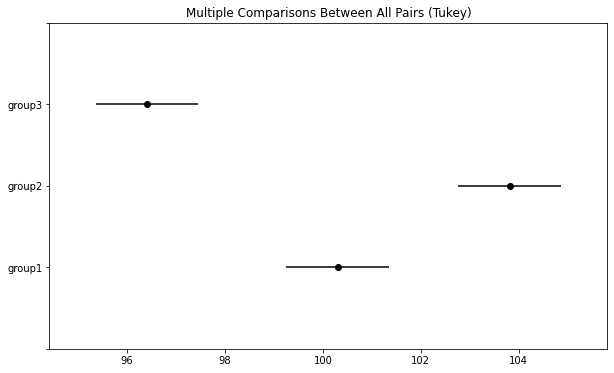

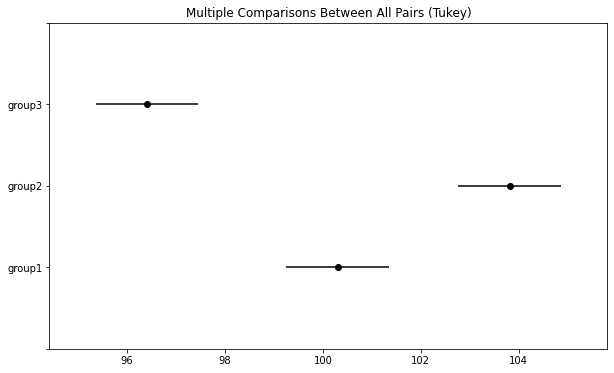

In [35]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['result'],
                            stacked_data['group'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd(alpha=alpha).summary())

MultiComp.tukeyhsd().plot_simultaneous()

In [36]:
# Finally, let's analyze the first set of group data, where there was NOT a significant difference between groups

# Put into dataframe

df = pd.DataFrame()
df['group1'] = group1a
df['group2'] = group1b
df['group3'] = group1c

# Stack the data (and rename columns):

stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})
# Show the dataframe:

print (stacked_data)

     id   group      result
0     0  group1  113.140291
1     0  group2  100.642997
2     0  group3   81.601137
3     1  group1  107.450555
4     1  group2  101.130205
..   ..     ...         ...
295  98  group2  113.392044
296  98  group3  118.550712
297  99  group1  105.935717
298  99  group2   87.699453
299  99  group3  107.751292

[300 rows x 3 columns]


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
group1 group2  -1.5287  0.586 -5.2191 2.1618  False
group1 group3  -2.7268  0.192 -6.4173 0.9636  False
group2 group3  -1.1982 0.7067 -4.8886 2.4923  False
---------------------------------------------------


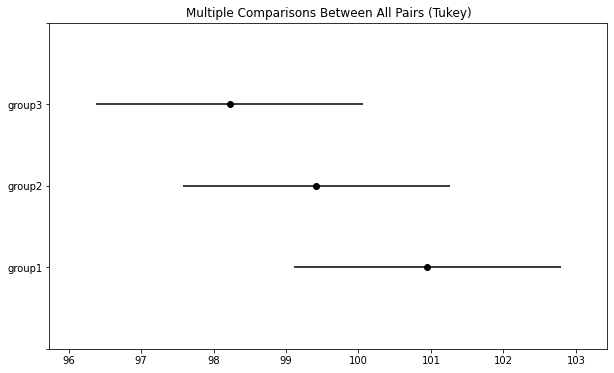

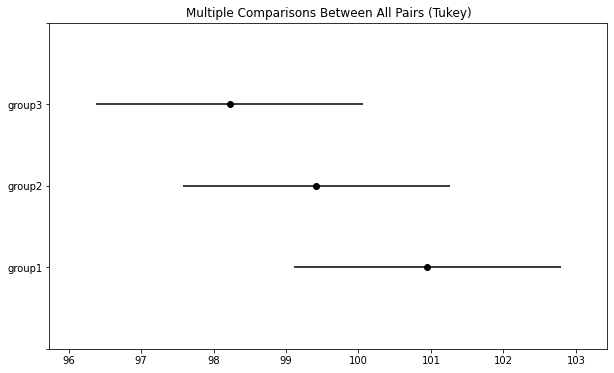

In [37]:
# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['result'],
                            stacked_data['group'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd(alpha=alpha).summary())

MultiComp.tukeyhsd().plot_simultaneous()

# Visualization of Raw Data

Once we have our raw data in a DataFrame, seaborn makes it really easy to quickly visualize what is going on!

In [38]:
# Put into dataframe

df2 = pd.DataFrame()
df2['group1'] = group2a
df2['group2'] = group2b
df2['group3'] = group2c

# Stack the data (and rename columns):

stacked_data2 = df2.stack().reset_index()
stacked_data2 = stacked_data2.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})
# Show the dataframe:

print (stacked_data2)

df1 = pd.DataFrame()
df1['group1'] = group1a
df1['group2'] = group1b
df1['group3'] = group1c

# Stack the data (and rename columns):

stacked_data1 = df1.stack().reset_index()
stacked_data1 = stacked_data1.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})
# Show the dataframe:

print (stacked_data1)

     id   group      result
0     0  group1  104.181073
1     0  group2  108.104789
2     0  group3   97.738105
3     1  group1   99.480854
4     1  group2  100.454991
..   ..     ...         ...
295  98  group2   94.182444
296  98  group3   80.489981
297  99  group1  100.329873
298  99  group2  106.092833
299  99  group3   89.525178

[300 rows x 3 columns]
     id   group      result
0     0  group1  113.140291
1     0  group2  100.642997
2     0  group3   81.601137
3     1  group1  107.450555
4     1  group2  101.130205
..   ..     ...         ...
295  98  group2  113.392044
296  98  group3  118.550712
297  99  group1  105.935717
298  99  group2   87.699453
299  99  group3  107.751292

[300 rows x 3 columns]


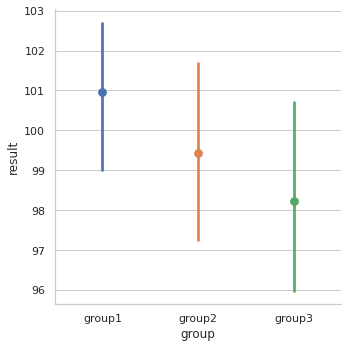

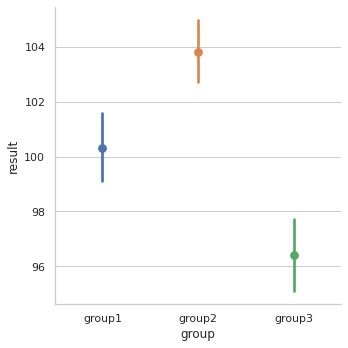

In [39]:
import seaborn as sns

sns.set(style="whitegrid")

sns.catplot("group","result",data=stacked_data1,kind="point",hue="group",hue_order=["group1","group2","group3"])
sns.catplot("group","result",data=stacked_data2,kind="point",hue="group",hue_order=["group1","group2","group3"])